In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.signal import butter, filtfilt
from Lab3Functions import get_power, get_bursts, import_data


Zusätzliche Funktionen


In [2]:
def butter_filter(data, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    filtered_data = filtfilt(b, a, data)
    return filtered_data

# Function to rectify the EMG signal
def rectify_signal(data):
    return np.abs(data)

# Function to apply low-pass filter for envelope detection
def lowpass_filter(data, cutoff, fs, order=4):
    nyquist = 0.5 * fs
    low = cutoff / nyquist
    b, a = butter(order, low, btype='low')
    envelope = filtfilt(b, a, data)
    return envelope


Hauptprogramm

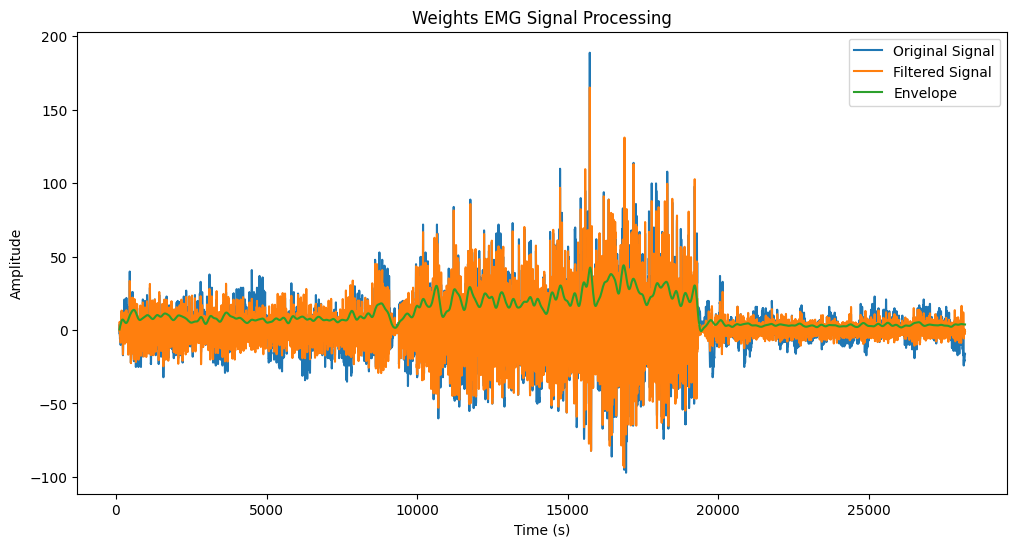

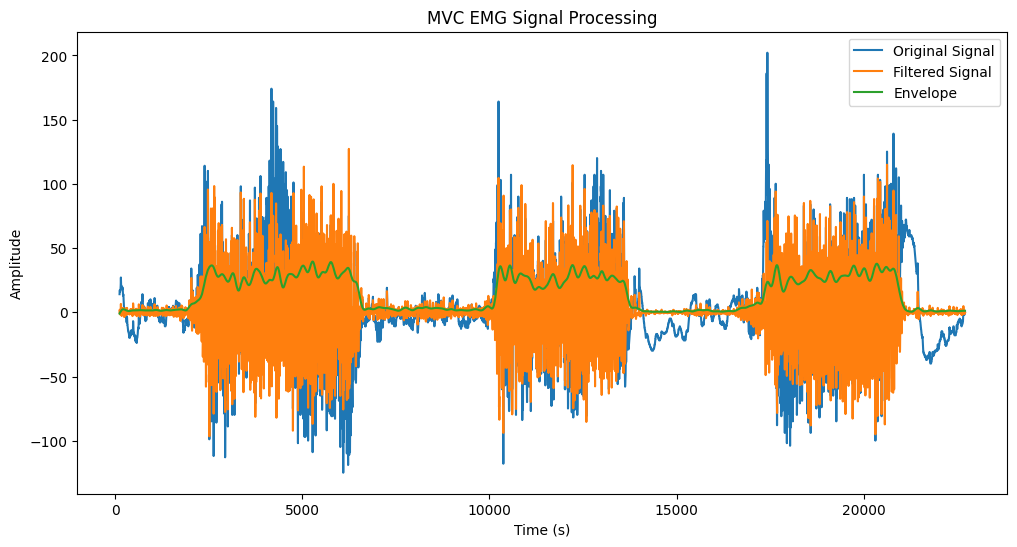

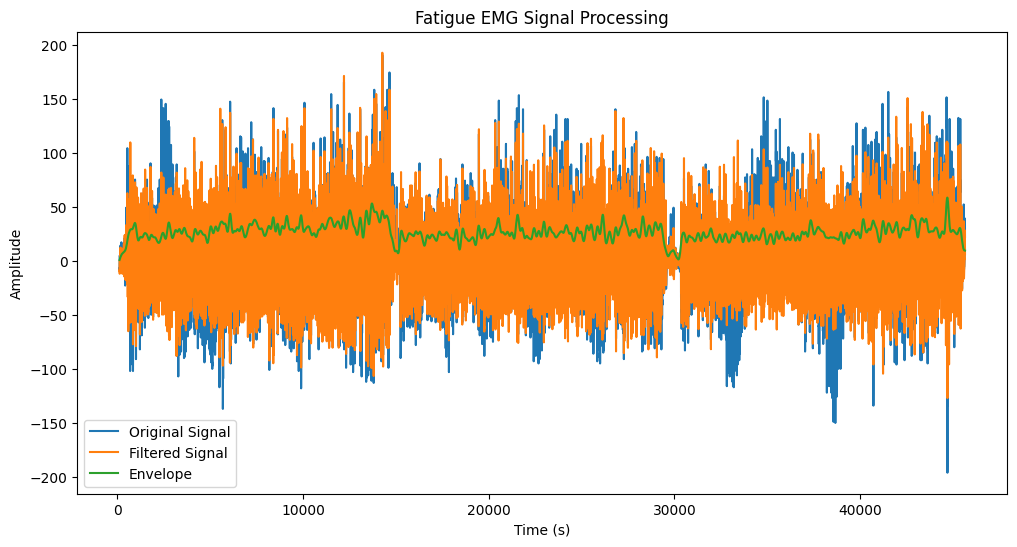

In [ ]:
# # Jupyter Notebook Main Function
# from matplotlib import figure
# from matplotlib.figure import Figure


# def process_emg(file_name, separator, sampling_frequency, lowcut, highcut, envelope_cutoff):
#     # Import data
#     data = pd.read_csv(file_name, sep=separator)
#     emg_raw = data['emg'].values
#     time = data['time'].values

#     # Step (a): Remove offset
#     offset = np.mean(emg_raw)
#     emg_offset_removed = emg_raw - offset

#     # Step (b): Bandpass filter the signal
#     mvc_emg_filtered = butter_filter(emg_offset_removed, lowcut, highcut, sampling_frequency)

#     # Step (c): Rectify the signal
#     emg_rectified = rectify_signal(mvc_emg_filtered)

#     # Step (d): Apply low-pass filter to extract envelope
#     emg_envelope = lowpass_filter(emg_rectified, envelope_cutoff, sampling_frequency)

#     # Plot the results
#     fig, axs = plt.subplots(4, 1, figsize=(12, 8))

#     axs[0].plot(time, emg_raw)
#     axs[0].set_title('Raw EMG Signal')
#     axs[0].set_xlabel('Time (s)')
#     axs[0].set_ylabel('Amplitude')

#     axs[1].plot(time, emg_offset_removed)
#     axs[1].set_title('Offset Removed')
#     axs[1].set_xlabel('Time (s)')
#     axs[1].set_ylabel('Amplitude')

#     axs[2].plot(time, mvc_emg_filtered)
#     axs[2].set_title('Bandpass Filtered (20-450 Hz)')
#     axs[2].set_xlabel('Time (s)')
#     axs[2].set_ylabel('Amplitude')

#     axs[3].plot(time, emg_envelope)
#     axs[3].set_title('Envelope of Rectified Signal')
#     axs[3].set_xlabel('Time (s)')
#     axs[3].set_ylabel('Amplitude')

#     plt.tight_layout()
#     plt.show()
    
# # Example usage for Jupyter Notebook
# file_name = 'Feli2.csv'  # Update this with your file path 
# separator = ';'          # Separator used in the CSV file
# sampling_frequency = 1000  # Hz
# lowcut = 20  # Hz
# highcut = 450  # Hz
# envelope_cutoff = 10  # Hz



# process_emg(file_name, separator, sampling_frequency, lowcut, highcut, envelope_cutoff)


Plots saved as 'mvc_emg_filtered_bursts.png', 'weights_emg_filtered_bursts.png', and 'fatigue_emg_filtered_bursts.png' for manual burst analysis.


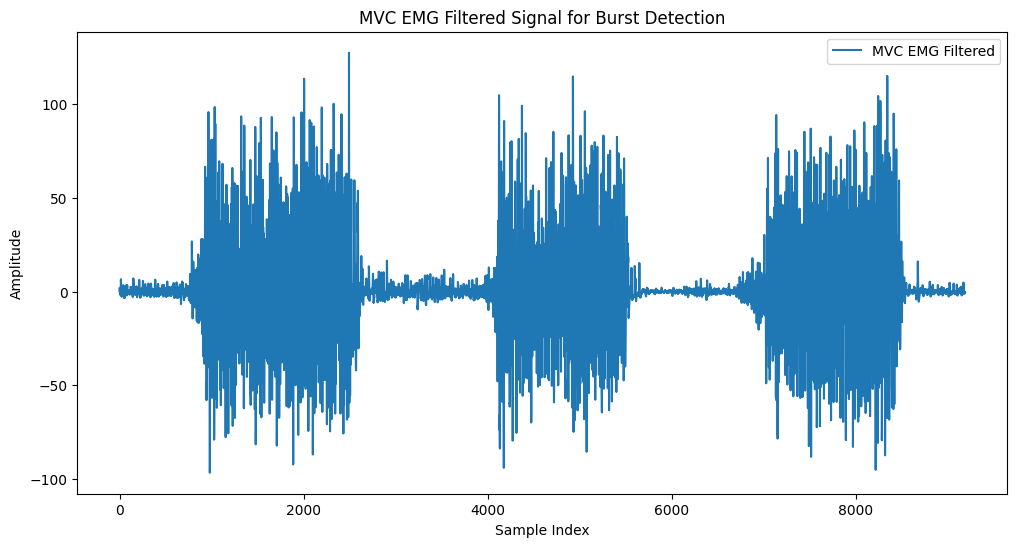

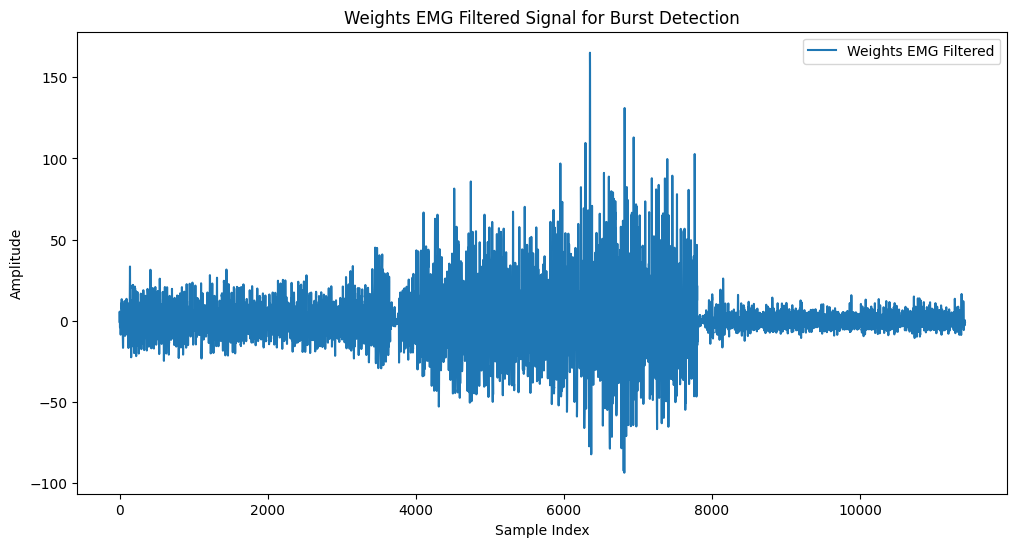

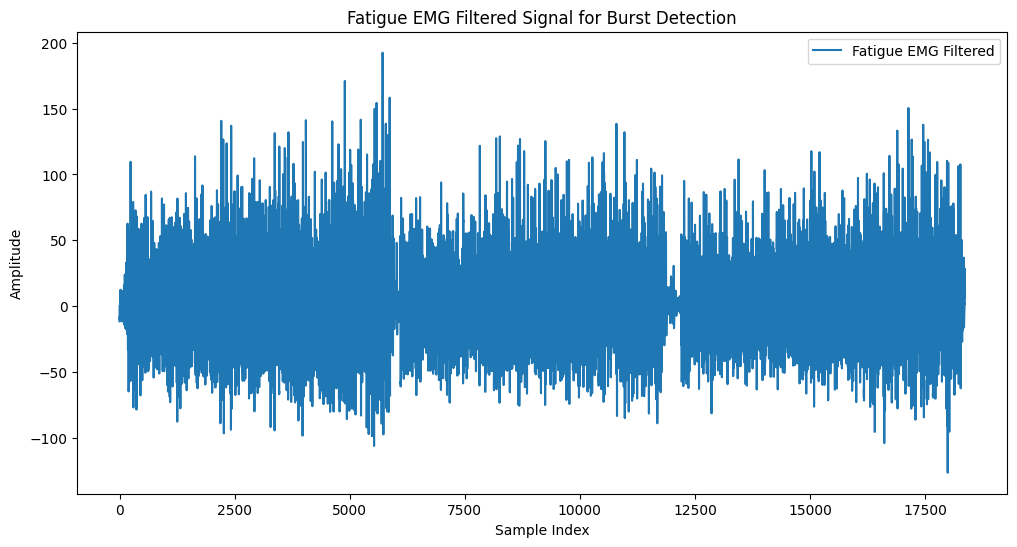

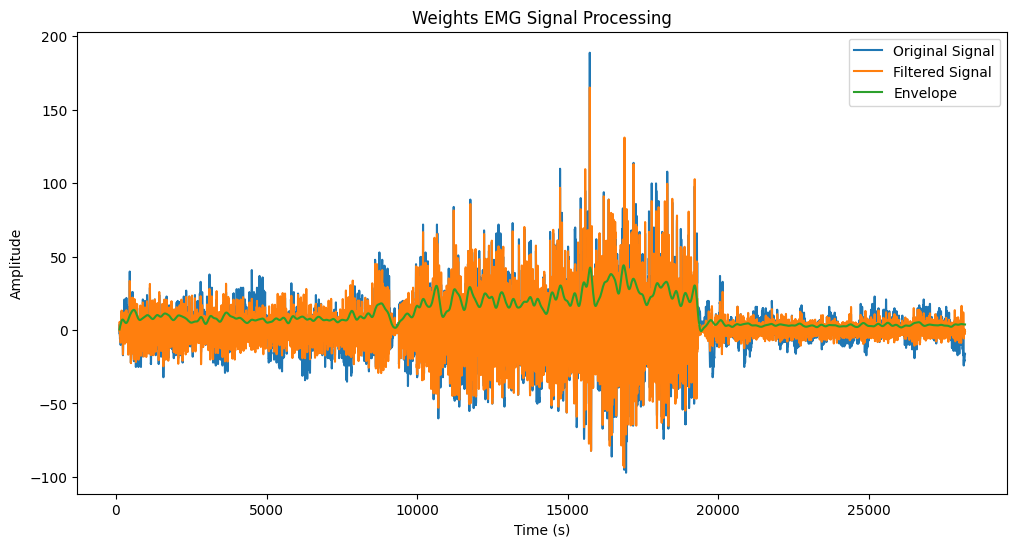

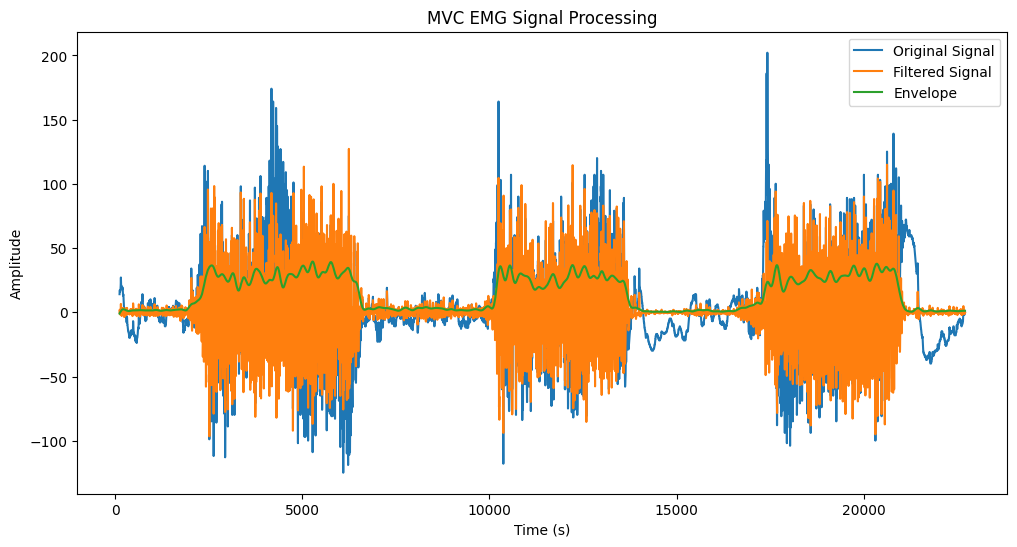

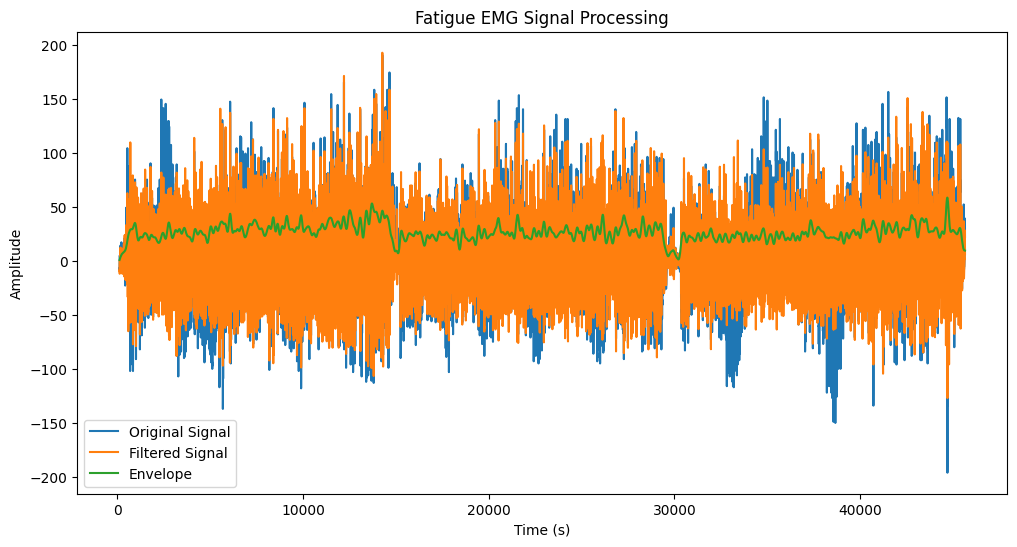

In [9]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, hilbert
from Lab3Functions import import_data, get_bursts

# Define filter functions
def butter_filter(data, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    filtered_data = filtfilt(b, a, data)
    return filtered_data

def rectify_signal(data):
    return np.abs(data)

def lowpass_filter(data, cutoff, fs, order=4):
    nyquist = 0.5 * fs
    low = cutoff / nyquist
    b, a = butter(order, low, btype='low')
    envelope = filtfilt(b, a, data)
    return envelope

# Step 1: Import datasets
separator = '\t'  # Ensure the correct separator is used
weights, mvc, fatigue = import_data(separator)

# Step 2: Preprocess data
sampling_frequency = 1000  # Adjust based on your dataset specifics
lowcut = 20  # 20 Hz for bandpass filter
highcut = 450  # 450 Hz for bandpass filter
envelope_cutoff = 10  # 10 Hz for low-pass filter to detect envelope

# Process each dataset
def process_emg_signal(emg_data, fs):
    # (a) Offset elimination
    emg_data['emg'] -= emg_data['emg'].mean()

    # (b) Bandpass filter
    emg_data['emg_filtered'] = butter_filter(emg_data['emg'], lowcut, highcut, fs)

    # (c) Rectification
    emg_data['emg_rectified'] = rectify_signal(emg_data['emg_filtered'])

    # (d) Envelope (Low-pass filter)
    emg_data['emg_envelope'] = lowpass_filter(emg_data['emg_rectified'], envelope_cutoff, fs)

    return emg_data

weights = process_emg_signal(weights, sampling_frequency)
mvc = process_emg_signal(mvc, sampling_frequency)
fatigue = process_emg_signal(fatigue, sampling_frequency)

# Extract filtered EMG signals for burst detection
mvc_emg_filtered = mvc['emg_filtered'].values
weights_emg_filtered = weights['emg_filtered'].values
fatigue_emg_filtered = fatigue['emg_filtered'].values

# Step 3: Detect bursts using get_bursts function
# Saving plots for manual burst selection
plt.figure(figsize=(12, 6))
plt.plot(mvc_emg_filtered, label='MVC EMG Filtered')
plt.title('MVC EMG Filtered Signal for Burst Detection')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.savefig('mvc_emg_filtered_bursts.png')

plt.figure(figsize=(12, 6))
plt.plot(weights_emg_filtered, label='Weights EMG Filtered')
plt.title('Weights EMG Filtered Signal for Burst Detection')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.savefig('weights_emg_filtered_bursts.png')

plt.figure(figsize=(12, 6))
plt.plot(fatigue_emg_filtered, label='Fatigue EMG Filtered')
plt.title('Fatigue EMG Filtered Signal for Burst Detection')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.savefig('fatigue_emg_filtered_bursts.png')

print("Plots saved as 'mvc_emg_filtered_bursts.png', 'weights_emg_filtered_bursts.png', and 'fatigue_emg_filtered_bursts.png' for manual burst analysis.")

# Placeholder for manual burst detection results
mvc_s, mvc_e, weights_s, weights_e, fatigue_s, fatigue_e = [None] * 6

# Step 4: Visualization of results
def plot_emg_signal(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data['t'], data['emg'], label='Original Signal')
    plt.plot(data['t'], data['emg_filtered'], label='Filtered Signal')
    plt.plot(data['t'], data['emg_envelope'], label='Envelope')
    plt.title(title)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

plot_emg_signal(weights, 'Weights EMG Signal Processing')
plot_emg_signal(mvc, 'MVC EMG Signal Processing')
plot_emg_signal(fatigue, 'Fatigue EMG Signal Processing')

# Optional: Save processed data
weights.to_csv('weights_processed.csv', index=False)
mvc.to_csv('mvc_processed.csv', index=False)
fatigue.to_csv('fatigue_processed.csv', index=False)


Click once to start zoom


KeyboardInterrupt: 

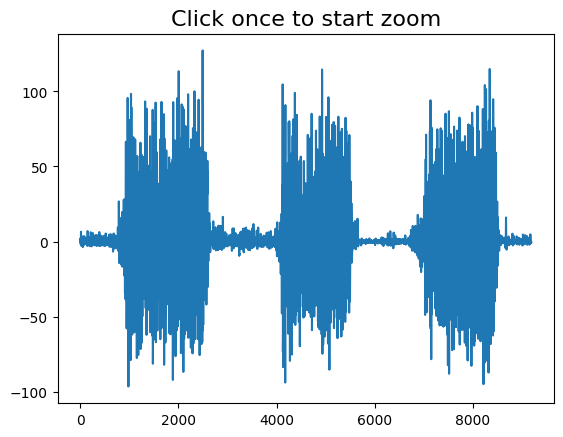

In [15]:
mvc_s, mvc_e, weights_s, weights_e, fatigue_s, fatigue_e = get_bursts(mvc_emg_filtered, weights_emg_filtered, fatigue_emg_filtered)